## 004_Python Simulation
### Stability Anslaysis 

<img src="004_Stability.png" style="width: 1000px;"/>

## Stability Example
<img src="005_Stability_Example.png" style="width: 1000px;"/>


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Transfer Function Process
K = 3; T = 4
num_p = np.array([K])
den_p = np.array([T, 1])
Hp = control.tf(num_p, den_p)
print('Hp(s) =', Hp)

# Transfer Function PI Controller
Kp = 0.4
Ti = 2
num_c = np.array([Kp*Ti, Kp])
den_c = np.array([Ti, 0])
Hc = control.tf(num_c, den_c)
print('Hc(s) =', Hc)

# Transfer Function Measurement
Tm = 1
num_m = np.array([1])
den_m = np.array([Tm, 1])
Hm = control.tf(num_m, den_m)
print('Hm(s) =', Hm)

# Transfer Function Lowpass Filter
Tf = 1
num_f = np.array([1])
den_f = np.array([Tf, 1])
Hf = control.tf(num_f, den_f)
print('Hf(s) =', Hf)

# The Loop Transfer Function
L = control.series(Hc, Hp, Hf, Hm)
print('L(s) =', L)



Hp(s) = 
   3
-------
4 s + 1

Hc(s) = 
0.8 s + 0.4
-----------
    2 s

Hm(s) = 
  1
-----
s + 1

Hf(s) = 
  1
-----
s + 1

L(s) = 
         2.4 s + 1.2
-----------------------------
8 s^4 + 18 s^3 + 12 s^2 + 2 s



T(s) = 
             2.4 s + 1.2
-------------------------------------
8 s^4 + 18 s^3 + 12 s^2 + 4.4 s + 1.2



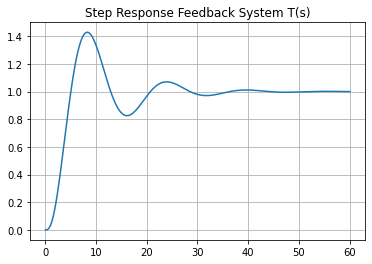

In [7]:
# Tracking Transfer Function
T = control.feedback(L, 1)
print('T(s) =', T)

# Step Response Feedback System (Tracking System)
t, y = control.step_response(T)
plt.figure(1)
plt.plot(t, y)
plt.title("Step Response Feedback System T(s)")
plt.grid()



(array([5.99580509e+01, 5.95443115e+01, 5.91334190e+01, 5.87253539e+01,
        5.83200966e+01, 5.79176278e+01, 5.75179282e+01, 5.71209788e+01,
        5.67267605e+01, 5.63352545e+01, 5.59464420e+01, 5.55603046e+01,
        5.51768236e+01, 5.47959809e+01, 5.44177581e+01, 5.40421372e+01,
        5.36691003e+01, 5.32986294e+01, 5.29307070e+01, 5.25653153e+01,
        5.22024370e+01, 5.18420546e+01, 5.14841510e+01, 5.11287090e+01,
        5.07757117e+01, 5.04251421e+01, 5.00769835e+01, 4.97312193e+01,
        4.93878329e+01, 4.90468079e+01, 4.87081280e+01, 4.83717771e+01,
        4.80377389e+01, 4.77059976e+01, 4.73765373e+01, 4.70493423e+01,
        4.67243969e+01, 4.64016855e+01, 4.60811928e+01, 4.57629034e+01,
        4.54468020e+01, 4.51328737e+01, 4.48211034e+01, 4.45114761e+01,
        4.42039771e+01, 4.38985916e+01, 4.35953051e+01, 4.32941031e+01,
        4.29949712e+01, 4.26978950e+01, 4.24028604e+01, 4.21098532e+01,
        4.18188595e+01, 4.15298653e+01, 4.12428568e+01, 4.095782

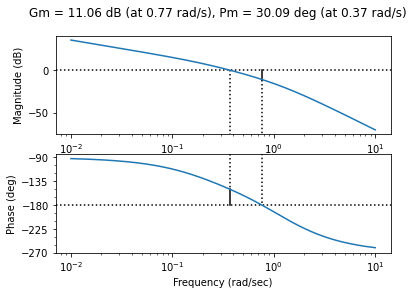

In [8]:
# Bode Diagram with Stability Margins
plt.figure(2)
control.bode(L, dB=True, deg=True, margins=True)


poles =  [-1.40867554+0.j         -0.61123728+0.j         -0.11504359+0.40121555j
 -0.11504359-0.40121555j]


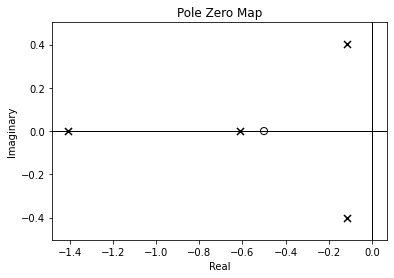

In [9]:
# Poles and Zeros
control.pzmap(T)
p = control.pole(T)
z = control.zero(T)
print("poles = ", p)

In [14]:
# Calculating stability margins and crossover frequencies
gm, pm, w180, wc = control.margin(L)

# Convert gm to Decibel
gmdb = 20*np.log10(gm)

print("wc =", f'{wc:.2f}', "rad/s")
print("w180 =", f'{w180:.2f}', "rad/s")

print("GM =", f'{gm:.2f}')
print("GM =", f'{gmdb:.2f}', "dB")
print("PM =", f'{pm:.2f}', "deg")

# Find when System is Marginally Stable (Critical Gain - Kc)
Kc = Kp*gm
print("Kc =", f'{Kc:.2f}')

wc = 0.37 rad/s
w180 = 0.77 rad/s
GM = 3.57
GM = 11.06 dB
PM = 30.09 deg
Kc = 1.43
